In [13]:
import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf


import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }

In [31]:
import importlib 
# importlib.reload(PandemiXModelFunctions)
importlib.reload(pmf)

SyntaxError: invalid syntax (PandemiXModelFunctions.py, line 202)

In [ ]:
# pars = {'beta': 0.5,'gamma': 1/7}
# pars_meta = ['beta','gamma']
# type(pars)

# pars_array =[]
# pars[pars_meta[0]]

# if (type(pars) == dict):
#     pars_array =[]
#     for i in range(len(pars)):
#         pars_array.append(pars[pars_meta[i]]) 

['S', 'I']
['S', 'I']


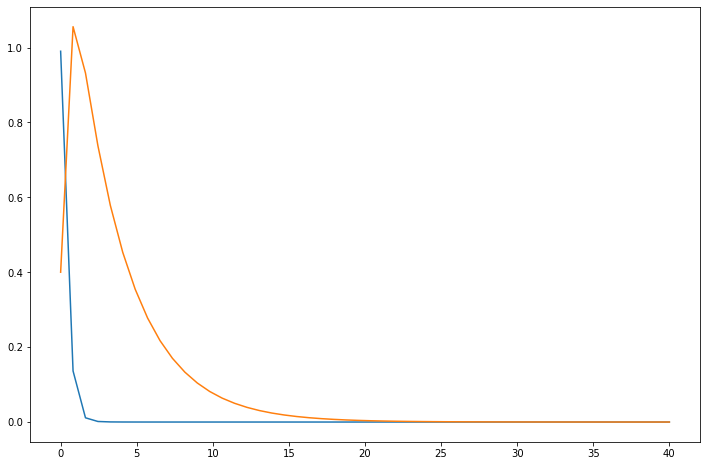

In [32]:
# pars = {'beta': 0.5,'gamma': 1/7}
# pars.items()
InitialConditions={'S':0.99,'I':0.01}
# InitialConditions.values()
ts = np.linspace(0,40)
asdf = pmf.simulateModel(TimeRange=ts,InitialConditions={'S':0.99,'I':0.4},Parameters={'beta':3,'gamma':0.3})

plt.figure()
plt.plot(ts,asdf[0,:])
plt.plot(ts,asdf[1,:])

In [42]:
# dfCase = pf.getLatest()
# plt.figure()
# plt.plot(dfCase.Date,dfCase.Total)

In [43]:
pmf.getModel('SIR')

<function PandemiXModelFunctions.SIRmodel(t, x, beta, gamma)>

In [44]:
# init = {'S0': 0.99,'I0': 0.01}
# pars = {'beta': 2/7, 'gamma': 1/7}
init = [0.99,0.01]
pars = [2/7,1/7]
curScheme = pmf.Scheme('SIR',init,pars,0,30)
len(curScheme.Changes)  

0

In [45]:
curScheme.simulate()

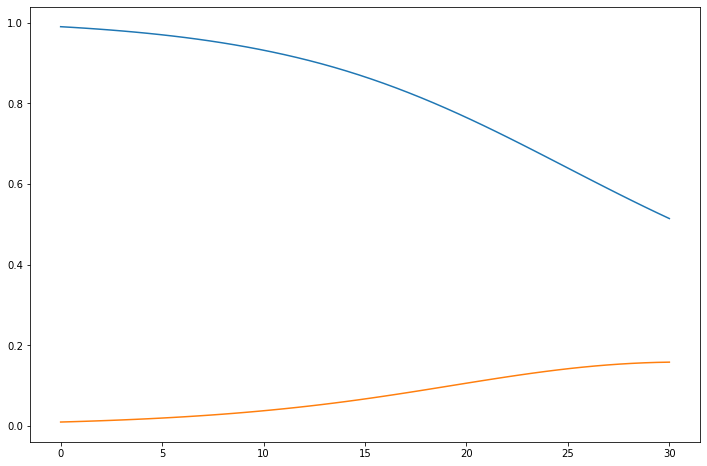

In [46]:
curScheme.result
curScheme.result.t
res = curScheme.result

plt.figure()
plt.plot(res.t,res.v[0,:])
plt.plot(res.t,res.v[1,:])

[0.99, 0.01]
[0.9316862 0.0379623]
[0.76501887 0.10609831]


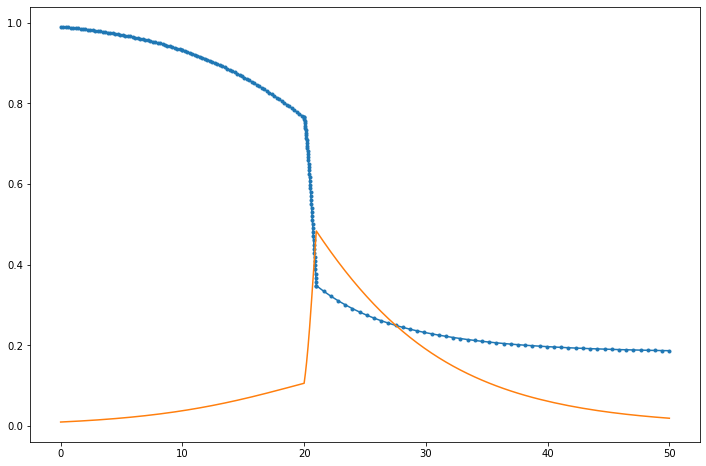

In [47]:
# toAdd = {'S0':3}
toAdd = [0.02,-0.02]
toAdd = [0,0]
testChange = pmf.Change(10,AddVariables = toAdd)
# testChange2 = pmf.Change(30,AddVariables = toAdd)
# testChange = pmf.Change(10,AddVariables = toAdd)
testChange2 = pmf.Change(20,MultiplyParameters = [10,1])
testChange3 = pmf.Change(21,MultiplyParameters = [0.05,1])
curScheme = []
curScheme = pmf.Scheme('SIR',init,pars,0,50)
curScheme.addChange(testChange)
curScheme.addChange(testChange2)
curScheme.addChange(testChange3)
curScheme.simulate()
# curScheme.result.t
plt.figure()
plt.plot(curScheme.result.t,curScheme.result.v[0,:],'.-')
plt.plot(curScheme.result.t,curScheme.result.v[1,:])

In [50]:
# testT = curScheme.result.t
# testV = curScheme.result.v
# # np.append(testT,testT)
# np.shape(np.concatenate([testV,testV],axis=1))
# # np.shape(np.concatenate([testT,testT],axis=0))


# # finalState = curScheme.result.v[:,-1]
# # asdf =finalState + toAdd



In [51]:
# ## Simulation schemes
# class Change:
#     def __init__(self,tChange,AddVariables = {},MultiplyVariables = {}):
#         self.t = tChange 
#         self.AddVariables = AddVariables
#         self.MultiplyVariables = MultiplyVariables
#         # TODO: Parameter changes
        
    
# class Scheme:
#     def __init__(self,ModelName,InitialConditions,Parameters,tStart,tEnd):
#         self.ModelName = ModelName
#         self.InitialConditions = InitialConditions
#         self.Parameters = Parameters
#         self.tStart = tStart
#         self.tEnd = tEnd
        
#         # Get reference to model
#         self.Model = getModel(ModelName)
        
#         # Initialize changes
#         self.Changes = []
        
#     def AddChange(ChangeToAdd):
#         self.Changes.append(ChangeTo)       
        